# Credit Card Behaviour Score Prediction

## Overview

This case study is provided by **IDFC Bank**, where the goal is to develop a **Behaviour Score** to predict the probability of credit card defaults. The model will assist in managing portfolio risk and optimizing customer credit decisions.

You will use two datasets:
- **Development Data**: Contains 96,806 credit card details with a "bad_flag" indicating if the customer has defaulted.
- **Validation Data**: A sample of 41,792 credit card details without the "bad_flag" for which you will predict default probabilities.

The objective is to build a predictive model and submit the predicted probabilities for the validation dataset. Documentation of the approach and insights is also required.

![IDFC Bank Logo](image1.png)

### Let's dive in!


In [29]:
import pandas as pd

df = pd.read_csv('Dev_data_to_be_shared 3\Dev_data_to_be_shared.csv')

In [21]:
df_val = pd.read_csv(r'validation_data_to_be_shared 3\validation_data_to_be_shared.csv')

# Dropping Columns with More Than 50% Missing Values

## Step 1: Check for Missing Values
```python
# Check the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100

# Display the percentage of missing values
print("Percentage of Missing Values:\n", missing_percentage)


In [2]:
## droping the columns which is havoinf more than 50% of null values
def drop_columns_with_nulls(df, threshold=0.5):
    null_threshold = len(df) * threshold
    columns_to_drop = df.columns[df.isnull().sum() > null_threshold]
    print(f"Columns dropped: {list(columns_to_drop)}")
    return df.drop(columns=columns_to_drop)

df_cleaned = drop_columns_with_nulls(df)

Columns dropped: ['bureau_148', 'bureau_433', 'bureau_435', 'bureau_436', 'bureau_437', 'bureau_438', 'bureau_444', 'bureau_445', 'bureau_446', 'bureau_447', 'bureau_448', 'bureau_449', 'bureau_451', 'onus_attribute_43', 'onus_attribute_44', 'onus_attribute_45', 'onus_attribute_46', 'onus_attribute_47', 'onus_attribute_48']


In [22]:
# List of columns to drop
columns_to_drop = ['bureau_148', 'bureau_433', 'bureau_435', 'bureau_436', 'bureau_437', 'bureau_438',
                   'bureau_444', 'bureau_445', 'bureau_446', 'bureau_447', 'bureau_448', 'bureau_449',
                   'bureau_451', 'onus_attribute_43', 'onus_attribute_44', 'onus_attribute_45', 
                   'onus_attribute_46', 'onus_attribute_47', 'onus_attribute_48']

# Drop the columns from the DataFrame
df_val = df_val.drop(columns=columns_to_drop)


In [3]:
X = df_cleaned.iloc[:,2:]
y = df_cleaned.iloc[:,1]


In [23]:
## applying imputation and pca to the df_test
X_val = df_val.iloc[:,:]

In [24]:
## need to store the account number for the final submission

account_number = X_val['account_number']

X_val.drop(columns=['account_number'], inplace=True)

# Exploratory Data Analysis

In [ ]:
df_X = pd.read_csv("Dev_data_to_be_shared.csv")

In [ ]:
df_X.describe()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
count,96806.000000,96806.000000,7.157500e+04,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,...,94212.0,94212.000000,94212.000000,94212.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000
mean,48403.500000,0.014173,1.542391e+05,9.570769,0.002207,4.092854,77.306435,0.006315,67.043550,0.081034,...,0.0,0.189657,0.044283,7.800673,0.588114,1.497158,0.545650,1.430491,0.121447,0.119208
std,27945.629417,0.118203,1.729925e+05,1513.967595,0.119240,301.580599,3164.987013,0.129545,2516.330899,14.203615,...,0.0,0.597298,0.369451,8.655149,1.059613,1.702795,1.055865,1.728950,0.601256,0.599697
min,1.000000,0.000000,2.500000e+04,0.000000,0.000000,0.000000,-109800.476600,0.000000,-3498.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24202.250000,0.000000,5.900000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,48403.500000,0.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,72604.750000,0.000000,1.810000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,11.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000
max,96806.000000,1.000000,2.800000e+06,398936.791000,25.000000,55000.000000,358986.000000,12.000000,358986.000000,3150.000000,...,0.0,18.000000,14.000000,102.000000,19.000000,38.000000,19.000000,38.000000,15.000000,15.000000


In [ ]:
for col in df_X.columns:
    print(f" {col}: {df_X[col].nunique()}")

 account_number: 96806
 bad_flag: 2
 onus_attribute_1: 970
 transaction_attribute_1: 84
 transaction_attribute_2: 8
 transaction_attribute_3: 79
 transaction_attribute_4: 256
 transaction_attribute_5: 10
 transaction_attribute_6: 242
 transaction_attribute_7: 5
 transaction_attribute_8: 4
 transaction_attribute_9: 5
 transaction_attribute_10: 1549
 transaction_attribute_11: 30
 transaction_attribute_12: 1141
 transaction_attribute_13: 1055
 transaction_attribute_14: 10
 transaction_attribute_15: 995
 transaction_attribute_16: 2196
 transaction_attribute_17: 18
 transaction_attribute_18: 1969
 transaction_attribute_19: 2609
 transaction_attribute_20: 50
 transaction_attribute_21: 2352
 transaction_attribute_22: 107
 transaction_attribute_23: 10
 transaction_attribute_24: 63
 transaction_attribute_25: 5098
 transaction_attribute_26: 26
 transaction_attribute_27: 4281
 transaction_attribute_28: 119
 transaction_attribute_29: 7
 transaction_attribute_30: 115
 transaction_attribute_31: 1612

<Axes: >

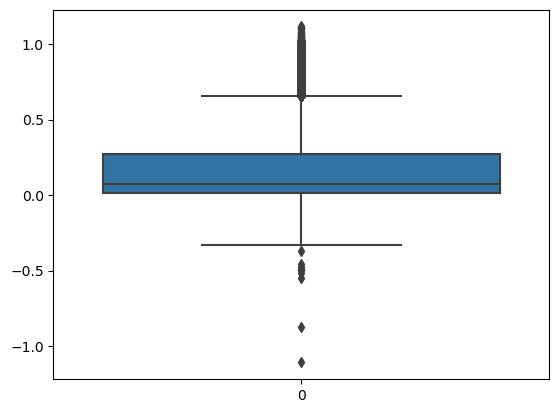

In [ ]:
sns.boxplot(df_X["onus_attribute_23"])

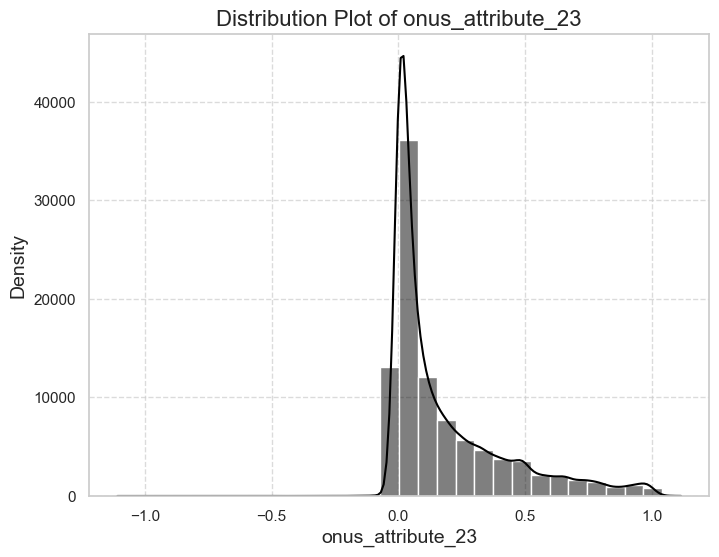

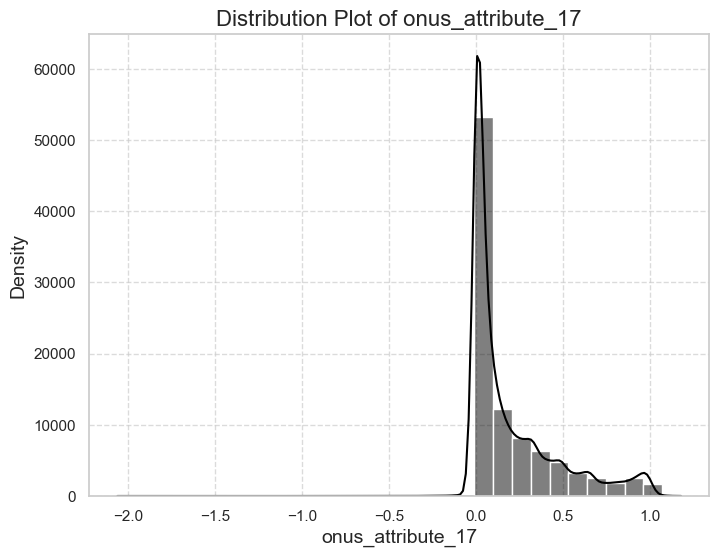

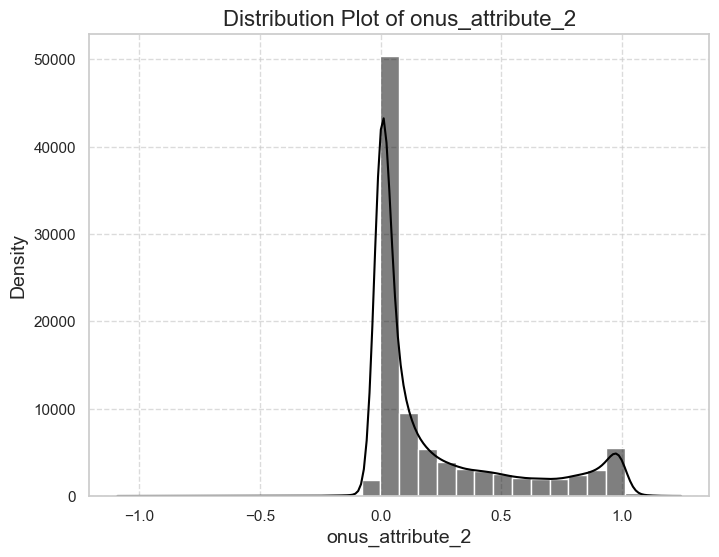

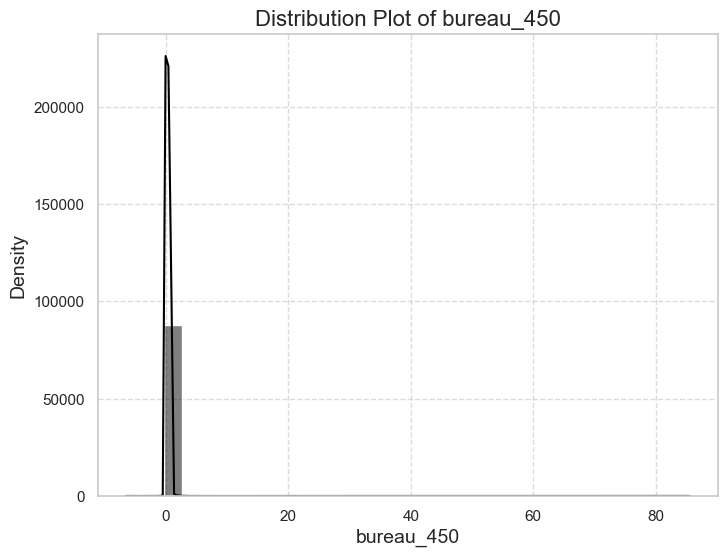

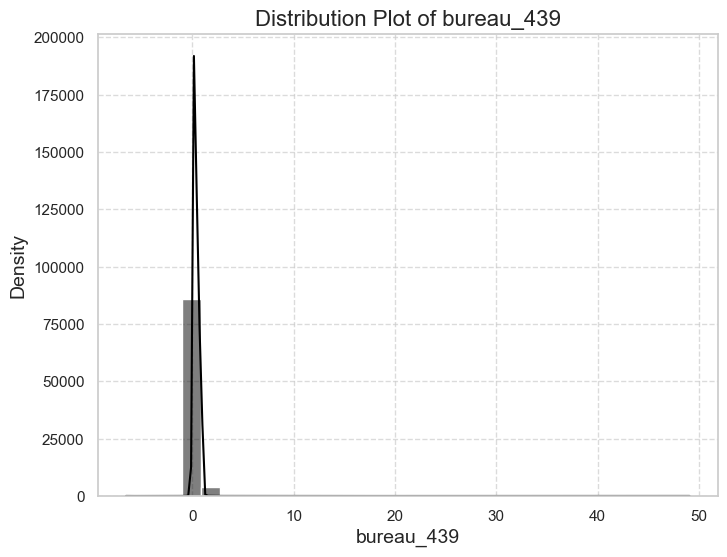

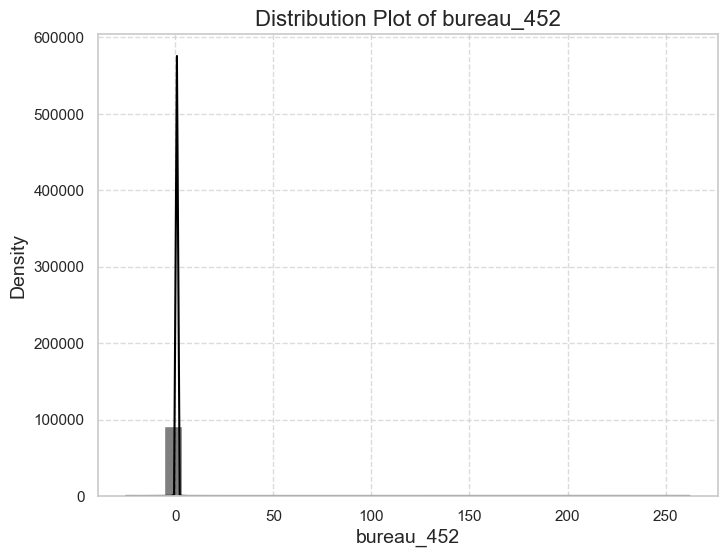

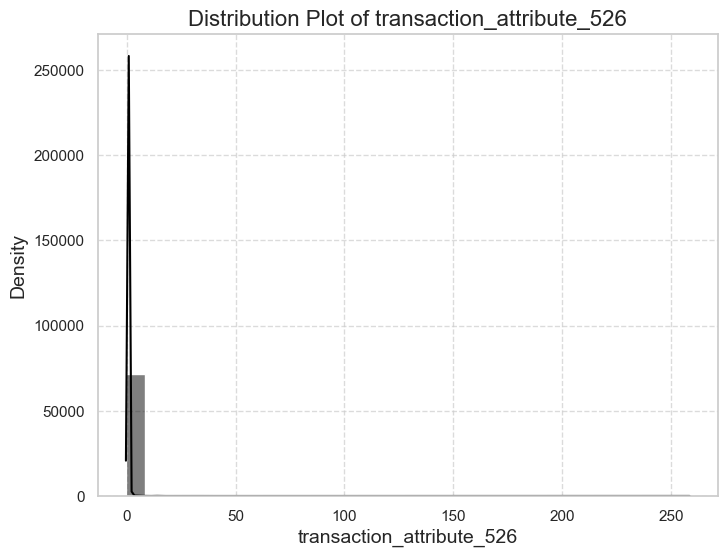

In [ ]:
columns_to_plot = ["onus_attribute_23","onus_attribute_17","onus_attribute_2","bureau_450","bureau_439","bureau_452","transaction_attribute_526"]
plot_distplots(df_X,columns_to_plot)

/var/folders/hm/qpkjv08j7px72fy7wpdt0s4h0000gn/T/ipykernel_2602/2181350939.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X["onus_attribute_23"])


onus_attribute_23
0.000000    0.038799
0.500000    0.000455
0.333333    0.000279
0.200000    0.000227
0.400000    0.000155
              ...   
0.018563    0.000010
0.483601    0.000010
0.415359    0.000010
0.256670    0.000010
0.749047    0.000010
Name: proportion, Length: 90306, dtype: float64

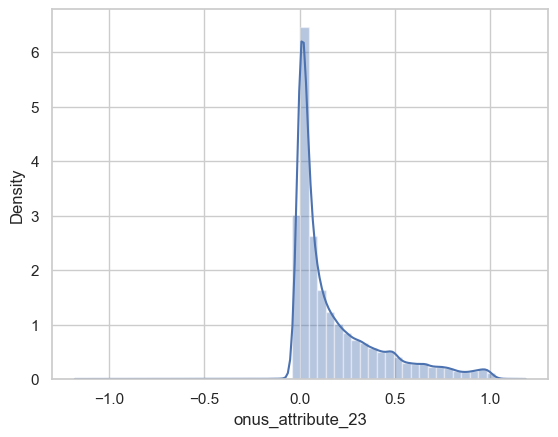

In [ ]:
sns.distplot(df_X["onus_attribute_23"])
df_X["onus_attribute_23"].value_counts()
df_X["onus_attribute_23"].value_counts(100)

/var/folders/hm/qpkjv08j7px72fy7wpdt0s4h0000gn/T/ipykernel_2602/934576621.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X["onus_attribute_17"])


onus_attribute_17
 0.000000    0.062114
 0.333333    0.000496
 0.500000    0.000434
 1.000000    0.000207
-0.000013    0.000186
               ...   
 0.051855    0.000010
 0.029952    0.000010
 0.043413    0.000010
 0.010005    0.000010
 0.706311    0.000010
Name: proportion, Length: 87284, dtype: float64

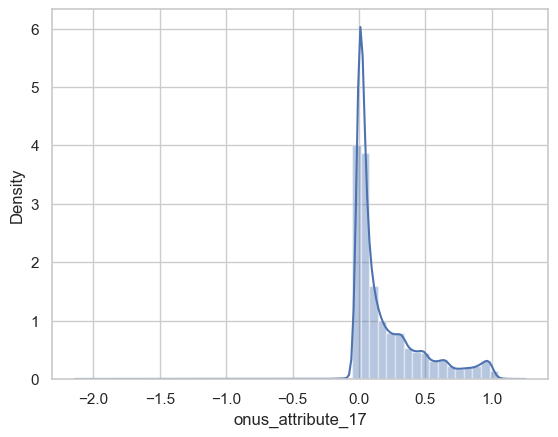

In [ ]:
sns.distplot(df_X["onus_attribute_17"])
df_X["onus_attribute_17"].value_counts()
df_X["onus_attribute_17"].value_counts(100)

/var/folders/hm/qpkjv08j7px72fy7wpdt0s4h0000gn/T/ipykernel_2602/257853309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X["onus_attribute_26"])


onus_attribute_26
0    0.820517
1    0.179483
Name: proportion, dtype: float64

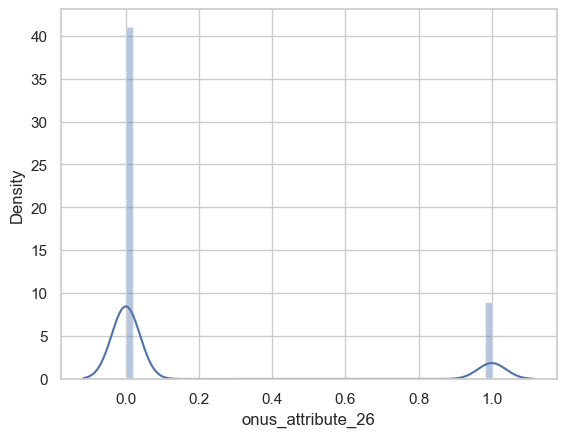

In [ ]:
sns.distplot(df_X["onus_attribute_26"])
df_X["onus_attribute_26"].value_counts()
df_X["onus_attribute_26"].value_counts(100)

/var/folders/hm/qpkjv08j7px72fy7wpdt0s4h0000gn/T/ipykernel_2602/3694506563.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X["bureau_450"])


bureau_450
 0.000000    0.039655
 1.000000    0.003293
-0.000040    0.000193
-0.000100    0.000148
-0.000067    0.000136
               ...   
 0.343500    0.000011
 0.619578    0.000011
 0.047323    0.000011
 0.071930    0.000011
 0.751661    0.000011
Name: proportion, Length: 83458, dtype: float64

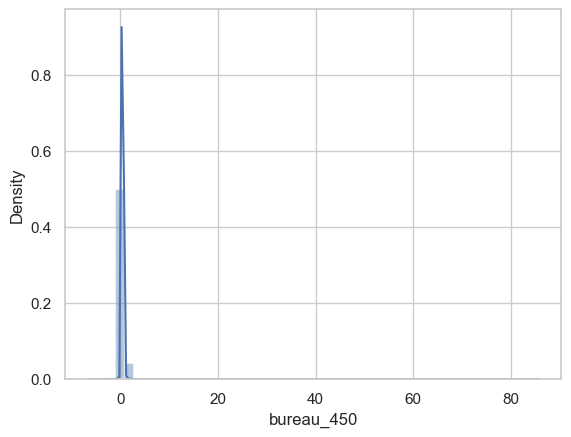

In [ ]:
sns.distplot(df_X["bureau_450"])
df_X["bureau_450"].value_counts()
df_X["bureau_450"].value_counts(100)

/var/folders/hm/qpkjv08j7px72fy7wpdt0s4h0000gn/T/ipykernel_2602/192109285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X["bureau_enquiry_11"])


bureau_enquiry_11
0.0     0.295907
1.0     0.170997
2.0     0.126343
3.0     0.095296
4.0     0.071753
5.0     0.055258
6.0     0.041778
7.0     0.031939
8.0     0.025485
9.0     0.018692
10.0    0.014680
11.0    0.011272
12.0    0.008767
13.0    0.007143
14.0    0.005233
15.0    0.004108
16.0    0.002983
17.0    0.002611
18.0    0.001709
19.0    0.001592
20.0    0.001242
21.0    0.000966
22.0    0.000732
23.0    0.000626
24.0    0.000584
25.0    0.000382
26.0    0.000350
27.0    0.000244
28.0    0.000234
31.0    0.000180
29.0    0.000159
32.0    0.000127
30.0    0.000106
33.0    0.000106
34.0    0.000074
36.0    0.000053
37.0    0.000053
38.0    0.000042
35.0    0.000032
39.0    0.000021
46.0    0.000021
40.0    0.000021
72.0    0.000011
42.0    0.000011
51.0    0.000011
53.0    0.000011
52.0    0.000011
56.0    0.000011
41.0    0.000011
43.0    0.000011
44.0    0.000011
Name: proportion, dtype: float64

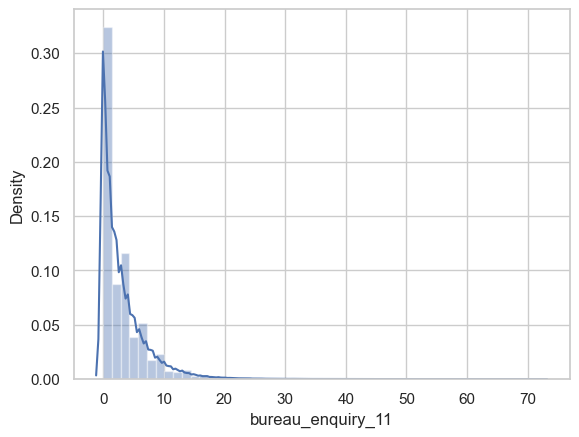

In [ ]:
sns.distplot(df_X["bureau_enquiry_11"])
df_X["bureau_enquiry_11"].value_counts()
df_X["bureau_enquiry_11"].value_counts(100)

/var/folders/hm/qpkjv08j7px72fy7wpdt0s4h0000gn/T/ipykernel_2602/3102517827.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X["onus_attribute_2"])


onus_attribute_2
 0.000000    0.140962
 1.000000    0.001622
-0.000040    0.000682
-0.000010    0.000516
-0.000200    0.000413
               ...   
 0.049678    0.000010
 0.094752    0.000010
 0.666064    0.000010
 0.076209    0.000010
 0.773345    0.000010
Name: proportion, Length: 75271, dtype: float64

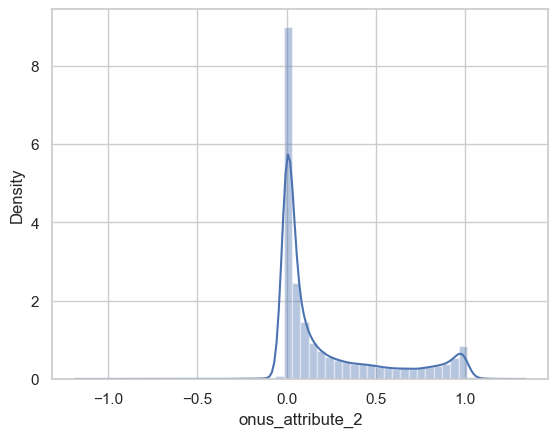

In [ ]:
sns.distplot(df_X["onus_attribute_2"])
df_X["onus_attribute_2"].value_counts()
df_X["onus_attribute_2"].value_counts(100)

/var/folders/hm/qpkjv08j7px72fy7wpdt0s4h0000gn/T/ipykernel_2602/2555818093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X["bureau_enquiry_3"])


bureau_enquiry_3
0.0     0.490203
1.0     0.198669
2.0     0.114688
3.0     0.069779
4.0     0.043869
5.0     0.027788
6.0     0.018405
7.0     0.011750
8.0     0.007833
9.0     0.005021
10.0    0.003683
11.0    0.002367
12.0    0.001804
13.0    0.001136
14.0    0.000817
15.0    0.000584
16.0    0.000329
17.0    0.000318
18.0    0.000223
19.0    0.000191
22.0    0.000138
20.0    0.000117
21.0    0.000106
28.0    0.000042
24.0    0.000032
34.0    0.000021
23.0    0.000021
38.0    0.000011
26.0    0.000011
42.0    0.000011
25.0    0.000011
33.0    0.000011
29.0    0.000011
Name: proportion, dtype: float64

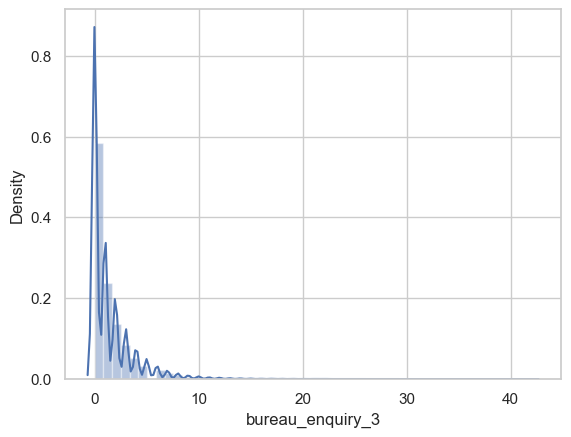

In [ ]:
sns.distplot(df_X["bureau_enquiry_3"])
df_X["bureau_enquiry_3"].value_counts()
df_X["bureau_enquiry_3"].value_counts(100)

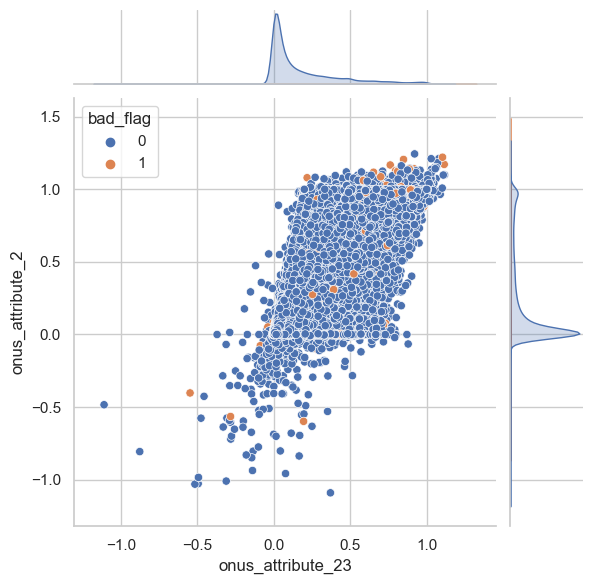

In [ ]:
sns.jointplot(x = "onus_attribute_23", y = "onus_attribute_2", hue = "bad_flag", data = df_X)

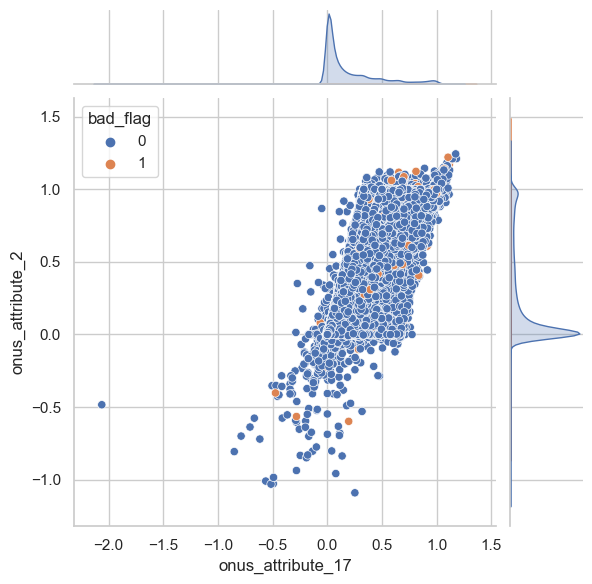

In [ ]:
sns.jointplot(x = "onus_attribute_17", y = "onus_attribute_2", hue = "bad_flag", data = df_X)

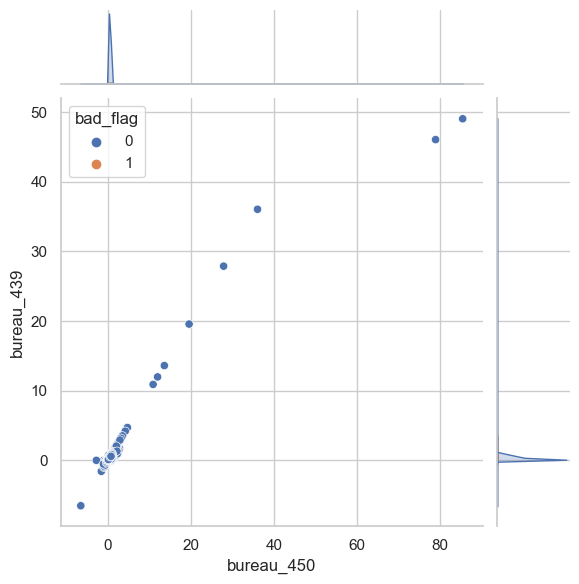

In [ ]:
sns.jointplot(x = "bureau_450", y = "bureau_439", hue = "bad_flag", data = df_X)

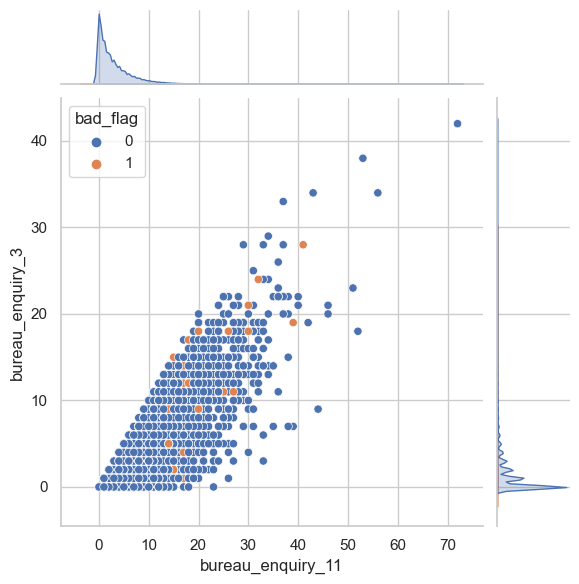

In [ ]:
sns.jointplot(x = "bureau_enquiry_11", y = "bureau_enquiry_3", hue = "bad_flag", data = df_X)

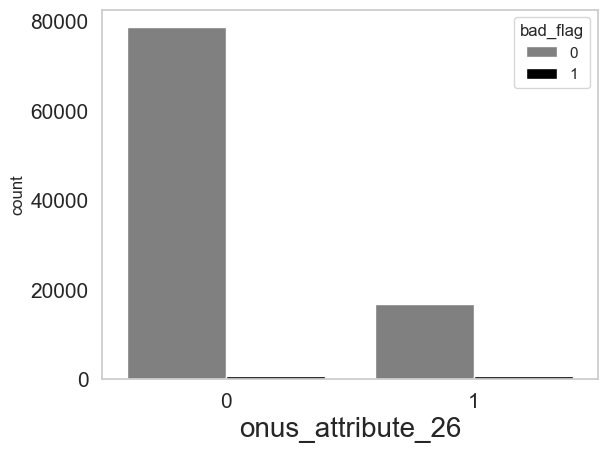

In [ ]:
sns.countplot(data = df_X,x = "onus_attribute_26",hue = "bad_flag", palette=['grey','black'])
# Remove gridlines
plt.grid(False)
plt.xlabel('onus_attribute_26', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

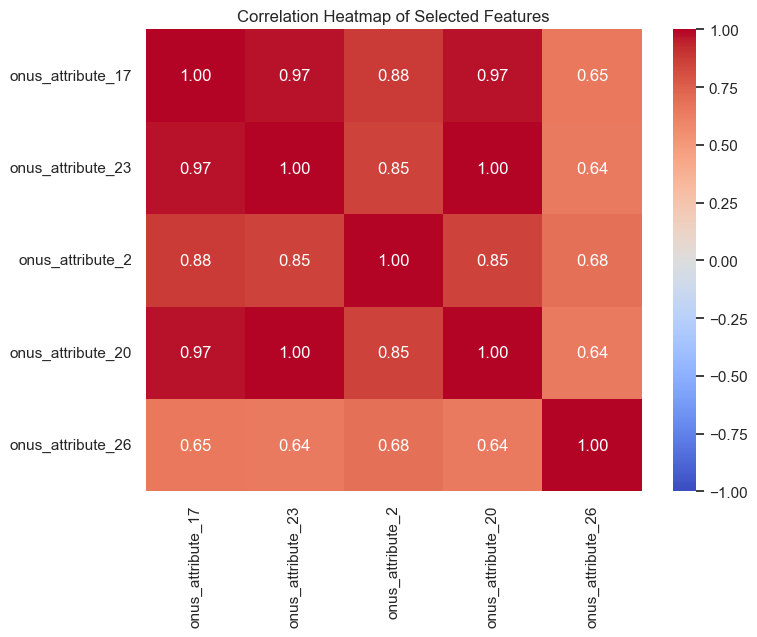

In [ ]:
features = [f'onus_attribute_{i}' for i in [17,23,2,20,26]]    

# Select only the features of interest
df_selected = df_X[features]

# Compute the correlation matrix
corr_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

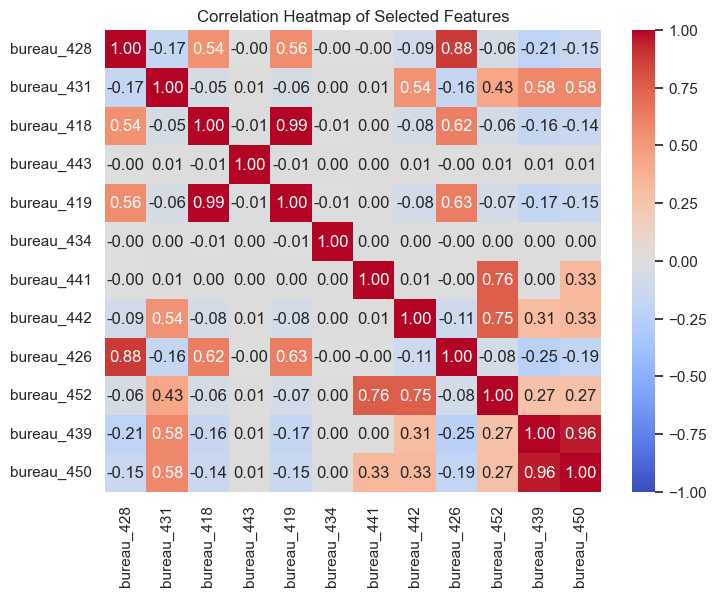

In [ ]:
features = [f'bureau_{i}' for i in [428,431,418,443,419,434,441,442,426,452,439,450]]    

# Select only the features of interest
df_selected = df_X[features]

# Compute the correlation matrix
corr_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

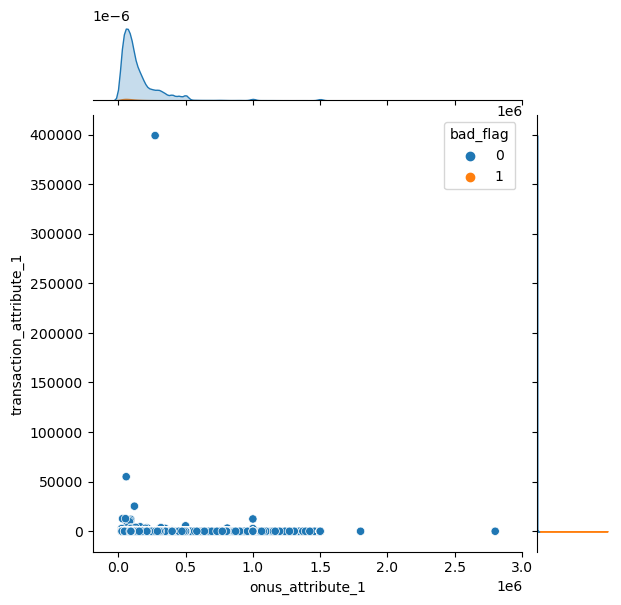

In [ ]:
sns.jointplot(y = "transaction_attribute_1", x = "onus_attribute_1", hue = "bad_flag", data = df_X)

# MCMC Imputation for Missing Values

## Step 1: Install Required Libraries
```bash
# Install necessary libraries
pip install pymc3 pandas numpy


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def mcmc_imputation(data, iterations=1000, burn_in=100):
    # Convert data to numpy array for easier manipulation
    data_array = data.values
    missing_idx = np.where(pd.isnull(data_array))
    
    # Initialize missing values randomly based on the column's mean
    col_means = np.nanmean(data_array, axis=0)
    for i, j in zip(*missing_idx):
        data_array[i, j] = col_means[j] + np.random.randn()

    # Store the imputed values for each iteration
    imputed_values = {idx: [] for idx in zip(*missing_idx)}

    for it in range(iterations):
        for i, j in zip(*missing_idx):
            # Impute missing value in column j based on other columns
            other_cols = np.delete(data_array, j, axis=1)
            observed_rows = ~np.isnan(other_cols).any(axis=1)
            
            if np.sum(observed_rows) > 0:
                observed_data = other_cols[observed_rows]
                observed_target = data_array[observed_rows, j]
                
                # Fit a simple linear regression model
                mean_val = np.nanmean(observed_target)
                std_val = np.nanstd(observed_target)
                imputed_value = norm.rvs(loc=mean_val, scale=std_val)
            else:
                # Fall back to the column mean if no observed rows
                imputed_value = col_means[j] + np.random.randn()
            
            # Update the missing value
            data_array[i, j] = imputed_value
            if it >= burn_in:
                imputed_values[(i, j)].append(imputed_value)

    # Take the mean of the sampled values after burn-in
    for (i, j), values in imputed_values.items():
        data_array[i, j] = np.mean(values)
    
    # Convert back to DataFrame
    imputed_data = pd.DataFrame(data_array, columns=data.columns, index=data.index)
    return imputed_data



# MICE Algorithm for Missing Value Imputation

## Step 1: Install Required Libraries
```bash
# Install necessary libraries
pip install fancyimpute pandas numpy


In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

def mice_imputation(data, max_iter=10, random_state=0):

    # Create the MICE imputer
    imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)
    
    # Perform imputation
    imputed_array = imputer.fit_transform(data)
    
    # Convert back to DataFrame
    imputed_data = pd.DataFrame(imputed_array, columns=data.columns, index=data.index)
    return imputed_data

# Principal Component Analysis (PCA)

## Step 1: Install Required Libraries
```bash
# Install necessary libraries
pip install pandas numpy scikit-learn matplotlib


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X_imputed = mcmc_imputation(X)

imputer = SimpleImputer(strategy='mean')  # Impute NaN with the mean of each column
X_imputed = imputer.fit_transform(X)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
pca = PCA(n_components=0.90)  # Retain 90% variance
X_pca = pca.fit_transform(X_scaled)

# Check the number of components (features) after PCA
print(f"Number of components after PCA: {X_pca.shape[1]}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.2f}")


Number of components after PCA: 282
Explained variance ratio: 0.90


In [25]:

X_val_imputed = mcmc_imputation(X_val)

X_val_imputed = imputer.transform(X_val)

X_val_scaled = scaler.transform(X_val_imputed)

X_val_pca = pca.transform(X_val_scaled)

In [5]:
df1 = pd.DataFrame(X_pca)

df1['bad_flag'] = y

df1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,273,274,275,276,277,278,279,280,281,bad_flag
0,24.302207,-14.058741,18.550611,-9.529182,-1.173996,2.621221,-2.365781,-0.338414,-0.547419,0.875796,...,-0.731887,-0.104515,-0.923284,-0.579025,-0.326814,-0.205961,-0.123436,0.255534,-0.292135,0
1,2.543473,9.687860,0.410354,6.338102,5.634863,-3.784708,0.724882,3.276991,9.714636,-1.154116,...,0.115795,0.470526,-0.009693,0.228612,0.128510,-0.093547,-1.064525,4.152457,-2.481498,0
2,-4.455459,0.300524,-1.043425,-0.501702,-4.300881,-1.876577,0.752158,-0.171127,-0.337499,1.990556,...,0.026406,-0.240801,-0.523598,0.208437,0.383390,-0.125086,0.020337,0.010742,0.051195,0
3,15.282622,-2.302571,5.498690,-7.731287,-5.602292,0.392621,-1.591738,0.594877,2.294565,1.046817,...,-0.141321,0.101913,-0.398879,-0.483955,-0.218478,-0.000621,-0.206874,0.641048,0.698254,0
4,-1.188822,-6.381537,1.486802,-0.141574,8.254005,4.270619,-0.861204,-0.462756,-0.809397,0.640172,...,-0.171843,-0.200417,0.263980,0.372351,-0.356352,-0.832471,0.195801,0.720658,-0.414870,0


In [6]:
df1.shape

(96806, 283)

In [7]:
## dropping the duplicates from the data
df1.drop_duplicates(inplace=True)
df1.shape

(96796, 283)

In [8]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]


In [9]:
y.value_counts()

bad_flag
0    95424
1     1372
Name: count, dtype: int64

In [10]:
## test traint split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
y_train.value_counts()

bad_flag
0    76334
1     1102
Name: count, dtype: int64

# Handling Imbalanced Data: Undersampling and Oversampling

## Step 1: Install Required Libraries
```bash
# Install necessary libraries
pip install pandas numpy scikit-learn imbalanced-learn


In [12]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check original class distribution
print("Original class distribution:", Counter(y_train))

# Step 1: Undersample the majority class
undersampler = RandomUnderSampler(sampling_strategy=0.07, random_state=42)  # Keep the majority 2x the minority
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

print("After undersampling:", Counter(y_resampled))

# Step 2: Oversample the minority class
oversampler = SMOTE(sampling_strategy=0.3, random_state=42)  # Make both classes equal
X_final, y_final = oversampler.fit_resample(X_resampled, y_resampled)

print("After oversampling:", Counter(y_final))


Original class distribution: Counter({0: 76334, 1: 1102})
After undersampling: Counter({0: 15742, 1: 1102})
After oversampling: Counter({0: 15742, 1: 4722})


# Model Training

## Step 1: Install Required Libraries
```bash
# Install necessary libraries
pip install pandas numpy scikit-learn


In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from collections import Counter

# Step 2: Fit the XGBoost model
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model with the resampled data
model.fit(X_final, y_final)

# Step 3: Predictions
y_pred_test = model.predict(X_test)

# Step 4: Evaluation
print("Classification Report on Resampled Data:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# ROC AUC Score
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred_test, average='weighted'))


Classification Report on Resampled Data:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19090
           1       0.07      0.11      0.09       270

    accuracy                           0.97     19360
   macro avg       0.53      0.55      0.53     19360
weighted avg       0.97      0.97      0.97     19360

Confusion Matrix:
[[18671   419]
 [  239    31]]
ROC AUC Score: 0.737972760607648
F1 Score: 0.97018035015224


In [14]:
## applying the rf model 
from sklearn.ensemble import RandomForestClassifier

# Step 2: Fit the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Fit the model with the resampled data
model_rf.fit(X_final, y_final)

# Step 3: Predictions
y_pred_test_rf = model_rf.predict(X_test)

# Step 4: Evaluation
print("Classification Report on Resampled Data:")
print(classification_report(y_test, y_pred_test_rf))


# Confusion Matrix
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_test_rf))

# ROC AUC Score
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("ROC AUC Score:", roc_auc_rf)

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred_test_rf, average='weighted'))



Classification Report on Resampled Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19090
           1       0.10      0.04      0.05       270

    accuracy                           0.98     19360
   macro avg       0.54      0.52      0.52     19360
weighted avg       0.97      0.98      0.98     19360

Confusion Matrix:
[[18996    94]
 [  260    10]]
ROC AUC Score: 0.7670053159497895
F1 Score: 0.9776965256425636


# Applying a Voting Classifier

## Introduction to Voting Classifier

A **Voting Classifier** is an ensemble learning method where multiple classifiers (models) are combined to make predictions. It works by **voting** for the final prediction. There are two types of voting:
- **Hard Voting**: The majority class label is selected.
- **Soft Voting**: The class with the highest average predicted probabilities is chosen.

In this example, we will use **Hard Voting** for classification.

## Step 1: Install Required Libraries
```bash
# Install necessary libraries
pip install scikit-learn


In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

# Create individual models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
svc = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create an ensemble of models using soft voting
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf), 
    ('lr', lr), 
    ('svc', svc), 
    ('knn', knn), 
    ('xgb', xgb)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_final, y_final)

# Make predictions on the test set
y_pred_test = ensemble_model.predict(X_test)

# Evaluation
print("Classification Report on Resampled Data:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# ROC AUC Score
y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred_test, average='weighted'))


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report on Resampled Data:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19090
           1       0.08      0.20      0.12       270

    accuracy                           0.96     19360
   macro avg       0.54      0.58      0.55     19360
weighted avg       0.98      0.96      0.97     19360

Confusion Matrix:
[[18502   588]
 [  216    54]]
ROC AUC Score: 0.7785881691015268
F1 Score: 0.96673648403131


In [18]:
import numpy as np
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV
from lightgbm import LGBMClassifier

# 2. Hyperparameter tuning for individual models using GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
rf_grid_search.fit(X_final, y_final)
best_rf = rf_grid_search.best_estimator_

# XGBoost hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0]
}
xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
xgb_grid_search.fit(X_final, y_final)
best_xgb = xgb_grid_search.best_estimator_

# 3. Create individual models
lr = LogisticRegression(random_state=42)
svc = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()
lgbm = LGBMClassifier(random_state=42)

# 4. Create an ensemble of models using soft voting
ensemble_model = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('lr', lr),
    ('svc', svc),
    ('knn', knn),
    ('xgb', best_xgb)
], voting='soft')

# 5. Train the ensemble model
ensemble_model.fit(X_final, y_final)

# 6. Make predictions on the test set
y_pred_test = ensemble_model.predict(X_test)

# 7. Evaluation
print("Classification Report on Resampled Data:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# ROC AUC Score
y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred_test, average='weighted'))

# 8. Stacking Classifier as an alternative ensemble approach
meta_model = LogisticRegression()
stacking_model = StackingClassifier(estimators=[
    ('rf', best_rf),
    ('lr', lr),
    ('svc', svc),
    ('knn', knn),
    ('xgb', best_xgb)
], final_estimator=meta_model)

stacking_model.fit(X_final, y_final)
y_pred_test_stack = stacking_model.predict(X_test)

print("\nStacking Classifier Report:")
print(classification_report(y_test, y_pred_test_stack))


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report on Resampled Data:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19090
           1       0.09      0.22      0.13       270

    accuracy                           0.96     19360
   macro avg       0.54      0.60      0.55     19360
weighted avg       0.98      0.96      0.97     19360

Confusion Matrix:
[[18476   614]
 [  210    60]]
ROC AUC Score: 0.7804848379023339
F1 Score: 0.9663179674627009


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m


Stacking Classifier Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19090
           1       0.07      0.06      0.06       270

    accuracy                           0.97     19360
   macro avg       0.53      0.53      0.53     19360
weighted avg       0.97      0.97      0.97     19360



In [19]:
# 6. Make predictions on the test set
y_pred_test = ensemble_model.predict(X_test)

# 7. Evaluation
print("Classification Report on Resampled Data:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# ROC AUC Score
y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred_test, average='weighted'))

Classification Report on Resampled Data:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19090
           1       0.09      0.22      0.13       270

    accuracy                           0.96     19360
   macro avg       0.54      0.60      0.55     19360
weighted avg       0.98      0.96      0.97     19360

Confusion Matrix:
[[18476   614]
 [  210    60]]
ROC AUC Score: 0.7804848379023339
F1 Score: 0.9663179674627009


In [20]:
## save the model 
import joblib

joblib.dump(ensemble_model, 'model.pkl')



['model.pkl']

In [27]:
 ## prediction on the validation data

# X_val_pca.columns = X_val_pca.columns.astype(str)
y_val_proba = ensemble_model.predict_proba(X_val_pca)[:, 1]

## Want to store the probability corresponding to the account number on new df

df_new = pd.DataFrame(account_number)

df_new['predicted_probability'] = y_val_proba

df_new.to_csv('submission_ensemble.csv',index=False)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd

# Define the model
model = RandomForestClassifier(random_state=42)

# Perform RFE
rfe = RFE(estimator=model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

print("Selected Features:", selected_features)


# Hyperparameter Tuning with Optuna

## Introduction to Optuna

**Optuna** is an automatic hyperparameter optimization framework that efficiently explores the hyperparameter space and finds the best parameters for machine learning models. It uses techniques like **Tree-structured Parzen Estimators (TPE)** to optimize hyperparameters, making it highly efficient for complex models.

## Step 1: Install Required Libraries
```bash
# Install Optuna and necessary libraries
pip install optuna scikit-learn xgboost


In [ ]:
import optuna

def objective(trial):
    # Define the hyperparameter search space
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5, 3.0),
        "random_state": 42,
        "eval_metric": "logloss",
        "use_label_encoder": False,
    }
    
    # Initialize and train the model
    model = XGBClassifier(**param)
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate with recall as the metric
    recall = recall_score(y_test, y_pred)
    
    return recall

# Run the Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Print the best hyperparameters
print("Best Trial:")
print(study.best_trial)

# Train the final model with the best hyperparameters
best_params = study.best_params
clf = XGBClassifier(**best_params, random_state=42, eval_metric="logloss", use_label_encoder=False)
clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Final Model Recall:", recall_score(y_test, y_pred))
print("Final Model Accuracy:", accuracy_score(y_test, y_pred))

[I 2025-01-14 11:20:41,351] A new study created in memory with name: no-name-9a91a451-352b-49e7-8412-c11a20339792
[I 2025-01-14 11:20:53,187] Trial 0 finished with value: 0.6761229314420804 and parameters: {'n_estimators': 207, 'learning_rate': 0.016821083679174877, 'max_depth': 8, 'subsample': 0.653900202543054, 'colsample_bytree': 0.7863615303867488, 'gamma': 4.609805146860437, 'min_child_weight': 9, 'scale_pos_weight': 1.0651573995834935}. Best is trial 0 with value: 0.6761229314420804.
[I 2025-01-14 11:20:55,545] Trial 1 finished with value: 0.7470449172576832 and parameters: {'n_estimators': 64, 'learning_rate': 0.054087920722328736, 'max_depth': 5, 'subsample': 0.8902220338280042, 'colsample_bytree': 0.94425503851713, 'gamma': 1.2375861188295838, 'min_child_weight': 4, 'scale_pos_weight': 2.185654281576987}. Best is trial 1 with value: 0.7470449172576832.
[I 2025-01-14 11:20:59,148] Trial 2 finished with value: 0.6382978723404256 and parameters: {'n_estimators': 176, 'learning_ra

Best Trial:
FrozenTrial(number=43, state=TrialState.COMPLETE, values=[0.8014184397163121], datetime_start=datetime.datetime(2025, 1, 14, 11, 23, 34, 409477), datetime_complete=datetime.datetime(2025, 1, 14, 11, 23, 36, 75582), params={'n_estimators': 79, 'learning_rate': 0.0281501233868265, 'max_depth': 3, 'subsample': 0.9388327118419731, 'colsample_bytree': 0.6516135419592571, 'gamma': 0.3122479216254253, 'min_child_weight': 9, 'scale_pos_weight': 2.9910279754280746}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'max_depth': IntDistribution(high=8, log=False, low=3, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'gamma': FloatDistribution(high=5.0, log=False, low=0.0, step=None), 'min_child_weight': I

# Applying Genetic Algorithm for Optimization

## Introduction to Genetic Algorithm (GA)

The **Genetic Algorithm (GA)** is an optimization technique inspired by the process of natural selection. It uses concepts such as **crossover**, **mutation**, and **selection** to find optimal or near-optimal solutions for complex problems. The GA operates through a population of candidate solutions (individuals), evolving over generations, and gradually improving the fitness of the solutions.

## Step 1: Install Required Libraries
```bash
# Install necessary libraries for Genetic Algorithm
pip install deap numpy


gen	nevals
0  	20    
1  	18    
2  	17    
3  	18    
4  	16    
5  	17    
6  	18    
7  	19    
8  	14    
9  	18    
10 	18    
Best Individual (Feature Mask): [1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC AUC Score: 0.7257


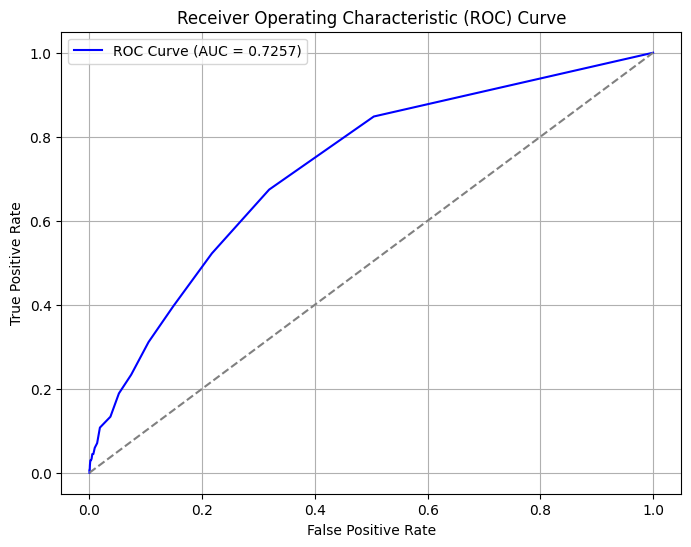

Confusion Matrix:
[[19092     0]
 [  270     0]]


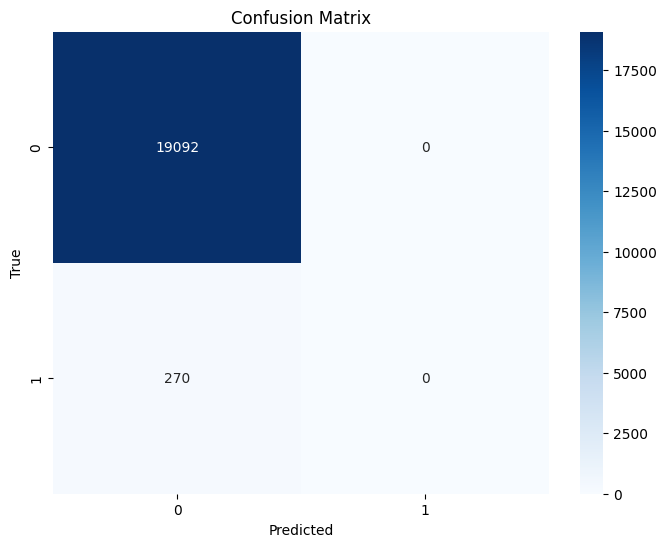

Test F1 Score: 0.9791316953716358


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score, roc_curve
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving the model

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Genetic Algorithm Setup
num_features = X_train.shape[1]  # Number of features
population_size = 20  # Number of individuals in the population
generations = 10  # Number of generations
crossover_prob = 0.8  # Crossover probability
mutation_prob = 0.2  # Mutation probability

def fitness_function(individual):
    # Convert to NumPy array if not already
    X_train_np = np.array(X_train)
    selected_features = [index for index, selected in enumerate(individual) if selected == 1]
    
    if not selected_features:  # Avoid individuals with no features selected
        return 0,
    
    # Select columns/features
    X_train_selected = X_train_np[:, selected_features]
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    accuracy = model.score(X_train_selected, y_train)
    
    return accuracy,

# GA Initialization
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

# Define the individual and population
toolbox.register("attr_bool", np.random.randint, 2)  # Each gene is 0 or 1
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, num_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Genetic operators
toolbox.register("mate", tools.cxUniform, indpb=0.5)  # Uniform crossover
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)  # Flip bit mutation
toolbox.register("select", tools.selTournament, tournsize=3)  # Tournament selection
toolbox.register("evaluate", fitness_function)

# Run the GA
population = toolbox.population(n=population_size)
result_population, _ = algorithms.eaSimple(population, toolbox, cxpb=crossover_prob, 
                                           mutpb=mutation_prob, ngen=generations, verbose=True)

# Extract the best individual
best_individual = tools.selBest(result_population, k=1)[0]
selected_features = [index for index, bit in enumerate(best_individual) if bit == 1]

# Results
print("Best Individual (Feature Mask):", best_individual)
print("Selected Features:", selected_features)

# Test the model with selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)
y_pred_test = model.predict(X_test_selected)

# Save the model
joblib.dump(model, "random_forest_model.pkl")
print("Model saved as random_forest_model.pkl")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# ROC AUC Score
if len(np.unique(y_test)) == 2:  # For binary classification
    y_pred_proba = model.predict_proba(X_test_selected)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print F1 Score
print("Test F1 Score:", f1_score(y_test, y_pred_test, average='weighted'))


# Applying an Ensemble Model with LogitShift Strategy

## Introduction to LogitShift Strategy

The **LogitShift** strategy is a method for combining multiple models in an ensemble by adjusting the predicted probabilities. It works by shifting the predicted logits (the raw model outputs) to improve the overall performance of the ensemble.

LogitShift uses a **logit adjustment** technique to re-scale the output probabilities from individual models before combining them. This can be helpful when dealing with imbalanced datasets or trying to improve model calibration.

In this example, we will implement an ensemble classifier using the **LogitShift** strategy to improve the predictions.

## Step 1: Install Required Libraries
```bash
# Install the necessary libraries
pip install scikit-learn
pip install logitshift


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scipy.stats import mode


# Initialize the models
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVC": SVC(probability=True, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Train each model and store the predictions
predictions = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    predictions[name] = model.predict(X_test)

# Combine predictions using majority voting
all_predictions = np.array(list(predictions.values()))  # Shape: (num_models, num_samples)
majority_vote = mode(all_predictions, axis=0).mode.flatten()  # Majority vote

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, majority_vote)
print(f"Ensemble Majority Vote Accuracy: {accuracy:.4f}")
## print the classification report
print("Classification Report:\n", classification_report(y_test, majority_vote))


# Optional: Print individual model accuracies
for name, preds in predictions.items():
    model_accuracy = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {model_accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, preds))


Training XGBoost...
Training Random Forest...
Training LightGBM...
[LightGBM] [Info] Number of positive: 6303, number of negative: 21011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72165
[LightGBM] [Info] Number of data points in the train set: 27314, number of used features: 283
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230761 -> initscore=-1.204020
[LightGBM] [Info] Start training from score -1.204020
Training Naive Bayes...
Training Logistic Regression...
Training SVC...
Training CatBoost...
Ensemble Majority Vote Accuracy: 0.9761
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      8989
           1       0.78      0.65      0.71       423

    accuracy                           0.98      9412
   macro avg       0.88      0.82      0.85      9412
weighted 

In [ ]:
import optuna
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define Optuna objective functions for XGBoost, CatBoost, and LightGBM
def objective_xgboost(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 250),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 42
    }
    model = XGBClassifier(**params)
    model.fit(X_train_resampled, y_train_resampled)
    y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the test set
    return f1_score(y_test, (y_proba >= 0.5).astype(int), average='weighted')  # Default threshold for optimization

def objective_catboost(trial):
    params = {
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 250),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_state': 42,
        'verbose': 0  # Suppress CatBoost output
    }
    model = CatBoostClassifier(**params)
    model.fit(X_train_resampled, y_train_resampled)
    y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the test set
    return f1_score(y_test, (y_proba >= 0.5).astype(int), average='weighted')  # Default threshold for optimization

def objective_lightgbm(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 250),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 50),
        'random_state': 42,
        'verbose': -1  # Suppress LightGBM output
    }
    model = LGBMClassifier(**params)
    model.fit(X_train_resampled, y_train_resampled)
    y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the test set
    return f1_score(y_test, (y_proba >= 0.5).astype(int), average='weighted')  # Default threshold for optimization

# Create Optuna studies for each model
def optimize_model(objective_func, n_trials=20):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective_func, n_trials=n_trials)
    return study.best_trials[:5]  # Return top 5 trials

# Optimize for XGBoost, CatBoost, and LightGBM
best_xgboost_trials = optimize_model(objective_xgboost)
best_catboost_trials = optimize_model(objective_catboost)
best_lightgbm_trials = optimize_model(objective_lightgbm)

# Extract the best models from each set of trials
def extract_best_models(best_trials, ModelClass):
    models = []
    for trial in best_trials:
        model = ModelClass(**trial.params)
        model.fit(X_train_resampled, y_train_resampled)
        models.append(model)
    return models

best_xgboost_models = extract_best_models(best_xgboost_trials, XGBClassifier)
best_catboost_models = extract_best_models(best_catboost_trials, CatBoostClassifier)
best_lightgbm_models = extract_best_models(best_lightgbm_trials, LGBMClassifier)

# Combine models into an ensemble using a voting classifier
ensemble_models = best_xgboost_models + best_catboost_models + best_lightgbm_models
ensemble = VotingClassifier(estimators=[ 
    (f'xgb_{i}', model) for i, model in enumerate(best_xgboost_models)] + 
    [(f'catboost_{i}', model) for i, model in enumerate(best_catboost_models)] + 
    [(f'lgbm_{i}', model) for i, model in enumerate(best_lightgbm_models)],
    voting='soft'  # Use soft voting to average probabilities
)

# Apply 100-fold Stratified Cross-Validation on the ensemble model
n_splits = 100
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
cv_predictions = cross_val_predict(ensemble, X_train_resampled, y_train_resampled, cv=stratkf, method='predict_proba')

y_proba_ensemble = cv_predictions[:, 1]  # This selects the probabilities for class 1

# Evaluate the performance of the ensemble model using a threshold of 0.5
y_pred_ensemble = (y_proba_ensemble >= 0.5).astype(int)

# Calculate performance metrics
accuracy = accuracy_score(y_train_resampled, y_pred_ensemble)
precision = precision_score(y_train_resampled, y_pred_ensemble, average='weighted')
recall = recall_score(y_train_resampled, y_pred_ensemble, average='weighted')
f1 = f1_score(y_train_resampled, y_pred_ensemble, average='weighted')
cm = confusion_matrix(y_train_resampled, y_pred_ensemble)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{cm}')

# Finally, evaluate the ensemble on the test set
ensemble.fit(X_train, y_train)
y_test_proba = ensemble.predict_proba(X_test)[:, 1]  # Get the probability for class 1 on the test set

# Determine best threshold using Youden's J-statistic
fpr, tpr, thresholds_roc = roc_curve(y_test, y_test_proba)
j_scores = tpr - fpr
best_threshold_roc = thresholds_roc[np.argmax(j_scores)]
print(f"Best Threshold (ROC Curve - Youden's J): {best_threshold_roc}")

# Apply the best threshold to the test set probabilities
y_test_pred_best = (y_test_proba >= best_threshold_roc).astype(int)

# Generate and display the classification report
print("Classification Report (Best Threshold):")
print(classification_report(y_test, y_test_pred_best))

# Plot the confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_best)
sns.heatmap(cm_test, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix on Test Data (Best Threshold)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
